In [12]:
import os
from copy import deepcopy

import torch
import numpy as np

In [15]:
from src.data.datasets import get_dual_cifar10
DATASET_NAME = 'dual_cifar10'

def get_held_out_data(nb_samples, transform):
    train_dataset, _, _ = get_dual_cifar10()
    if transform is not None:
        train_dataset_blurred = deepcopy(train_dataset)
        train_dataset_blurred.transform2 = transform
    y_data = np.array(train_dataset.dataset.targets)
    num_classes = len(np.unique(y_data))
    nb_samples_per_class = nb_samples // num_classes
    idxs = []
    for i in range(num_classes):
        idxs_i = np.where(y_data == i)[0]
        sampled_idxs_i = np.random.choice(idxs_i, size=nb_samples_per_class, replace=False)
        idxs.append(sampled_idxs_i)
        
    idxs = np.concatenate(idxs)
    selected_elements = [train_dataset[i] for i in idxs]
    x_data, y_data = zip(*selected_elements)
    x_data_left, x_data_right = zip(*x_data)
    
    x_data_left = torch.stack(x_data_left)
    x_data_right = torch.stack(x_data_right)
    y_data = torch.tensor(y_data)
    
    
    selected_elements_blurred = [train_dataset_blurred[i] for i in idxs]
    x_data_blurred, y_data = zip(*selected_elements_blurred)
    x_data_left_blurred, x_data_right_blurred = zip(*x_data_blurred)
    
    x_data_left_blurred = torch.stack(x_data_left_blurred)
    x_data_right_blurred = torch.stack(x_data_right_blurred)
    y_data = torch.tensor(y_data)
    
    if not os.path.exists('data'):
        os.mkdir('data')
                
    torch.save(x_data_left, f'data/{DATASET_NAME}_held_out_proper_x_left.pt')
    torch.save(x_data_right, f'data/{DATASET_NAME}_held_out_proper_x_right.pt')
    torch.save(y_data, f'data/{DATASET_NAME}_held_out_y.pt')
    
    
    torch.save(x_data_left_blurred, f'data/{DATASET_NAME}_held_out_blurred_x_left.pt')
    torch.save(x_data_right_blurred, f'data/{DATASET_NAME}_held_out_blurred_x_right.pt')
    # np.save(f'data/{dataset_name}_held_out_x.npy', x_data)
    # np.save(f'data/{dataset_name}_held_out_y.npy', y_data)
    # return x_data_fellow, x_data_amblyopic, y_data

In [17]:
from src.data.transforms import TRANSFORMS_NAME_MAP
transform_blurred = TRANSFORMS_NAME_MAP['transform_train_blurred'](32, 32, 1/4, 0)

get_held_out_data(nb_samples=1000, transform=transform_blurred)

Files already downloaded and verified
overlap: 0.0 with_overlap: 0.5
Files already downloaded and verified
overlap: 0.0 with_overlap: 0.5
Files already downloaded and verified
overlap: 0.0 with_overlap: 0.5


In [18]:
proper_x_left = torch.load(f'data/dual_cifar10_held_out_proper_x_left.pt')
proper_x_right = torch.load(f'data/dual_cifar10_held_out_proper_x_right.pt')
blurred_x_right = torch.load(f'data/dual_cifar10_held_out_blurred_x_right.pt')

In [20]:
proper_x_left.shape

torch.Size([1000, 3, 32, 16])

In [ ]:
# x_data_proper = [transform_train_proper(x) for x in x_data]
# x_data_proper = torch.stack(x_data_proper)
# y_data_proper = torch.from_numpy(y_data)

# torch.save(x_data_proper, f'data/{DATASET_NAME}_held_out_proper_x.pt')
# torch.save(y_data_proper, f'data/{DATASET_NAME}_held_out_proper_y.pt')

In [ ]:
# x_data_blurred = [transform_blurred(x) for x in x_data]
# x_data_blurred = torch.stack(x_data_blurred)
# y_data_blurred = torch.from_numpy(y_data)

# torch.save(x_data_blurred, f'data/{DATASET_NAME}_held_out_blurred_x.pt')
# torch.save(y_data_blurred, f'data/{DATASET_NAME}_held_out_blurred_y.pt')

In [ ]:
description = 'proper'
path = f'data/{DATASET_NAME}_held_out_{description}_x_fellow.pt'
torch.load(path)

In [21]:
import torchvision
import numpy as np

import matplotlib.pyplot as plt
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


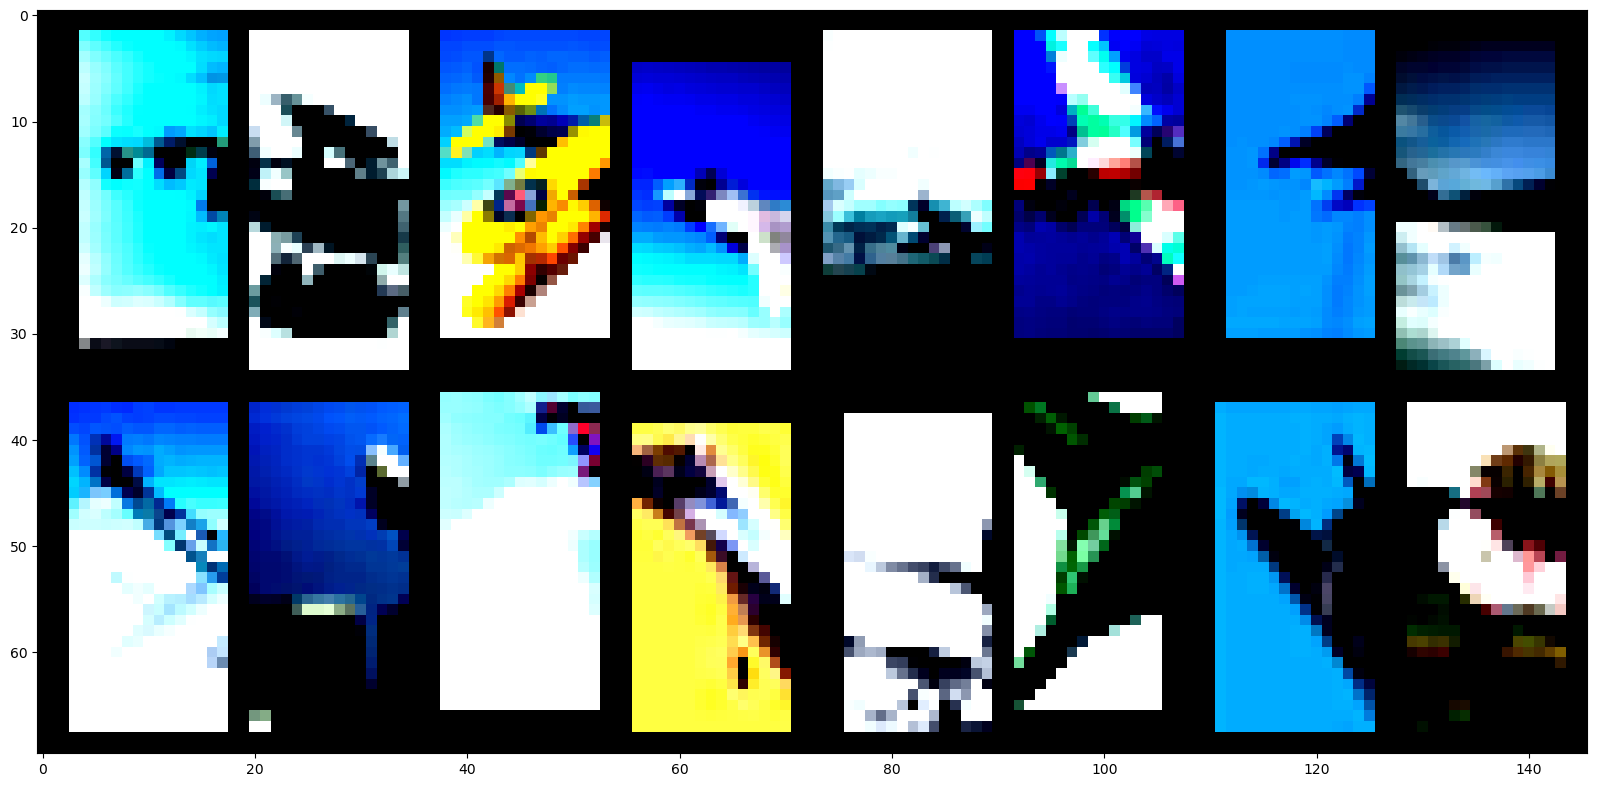

In [22]:
grid = torchvision.utils.make_grid(proper_x_left[:16])
show(grid)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


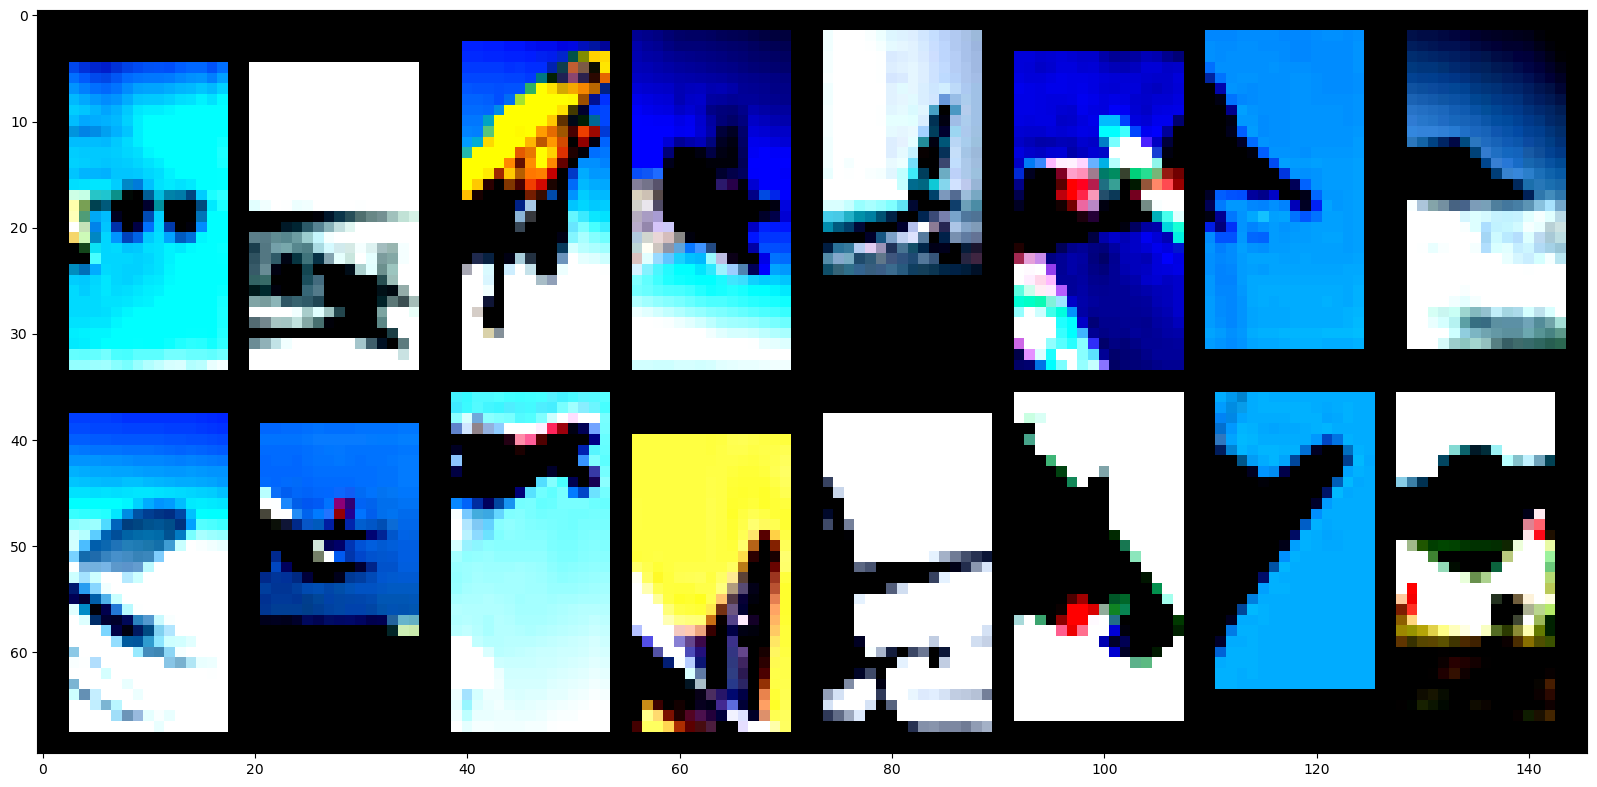

In [23]:
grid = torchvision.utils.make_grid(proper_x_right[:16])
show(grid)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


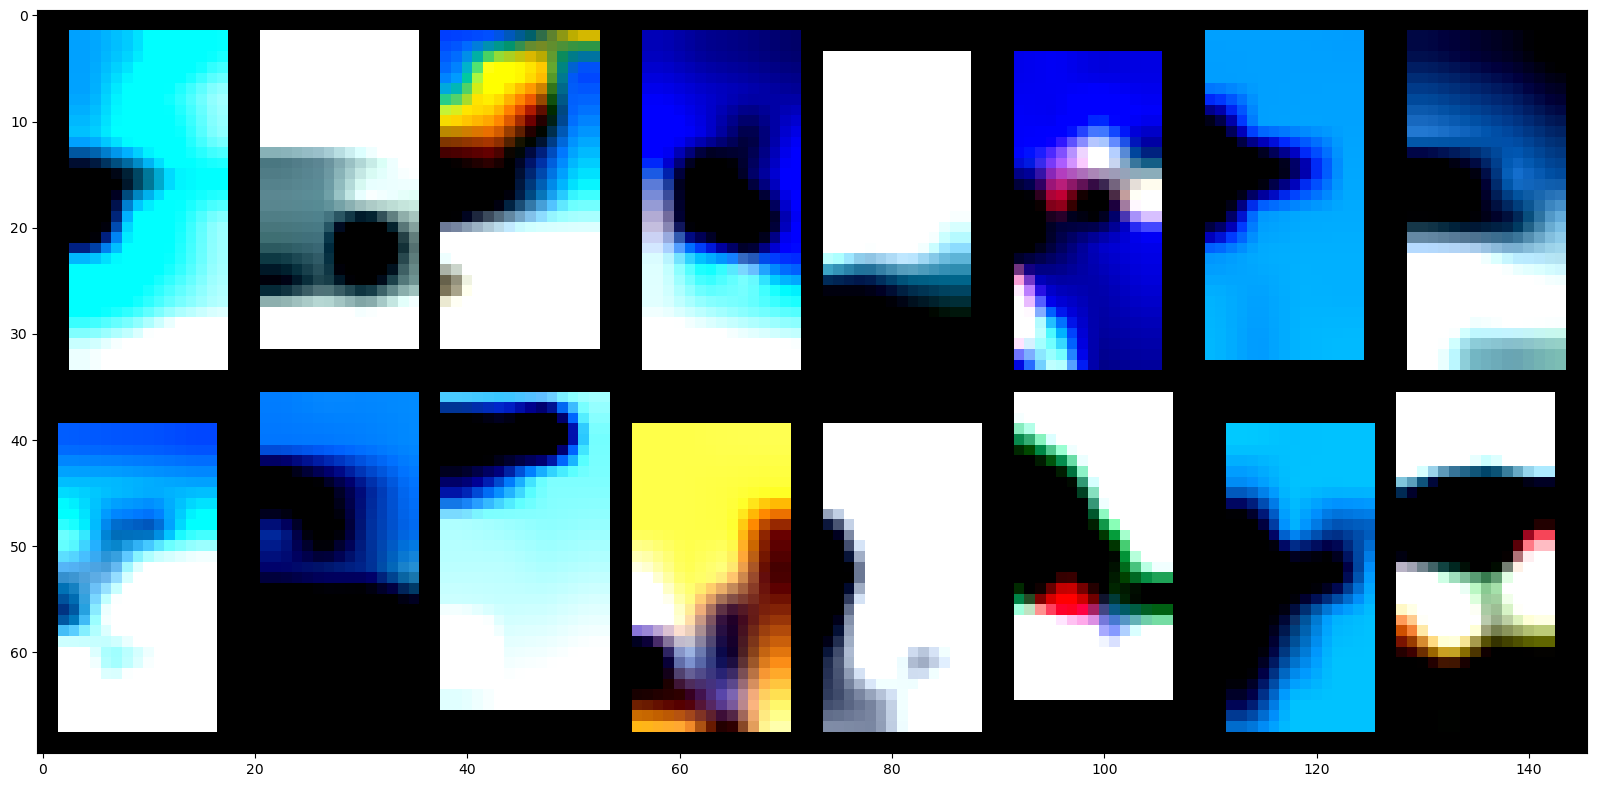

In [24]:
grid = torchvision.utils.make_grid(blurred_x_right[:16])
show(grid)


In [7]:
import torch
criterion = torch.nn.CrossEntropyLoss()

y1 = torch.randn(2, 5, requires_grad=True)
y2 = torch.randn(2, 1, requires_grad=True)

In [8]:
y1.shape,y2.shape

(torch.Size([2, 5]), torch.Size([2, 1]))

In [9]:
criterion(y1, y2)

RuntimeError: 0D or 1D target tensor expected, multi-target not supported